# Importando as bibliotecas

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print (tf.__version__)

2.17.0


# Carregando o Dataset

In [5]:
import pandas as pd

# Definindo os nomes das colunas
nomes_colunas = ['Consumo (MPG)', "Cilindrada", "Cilindros", "Potência", "Peso", "Aceleração", "Ano do Modelo", "Origem"]

# Carregando o dataset
raw_dataset = pd.read_csv(
    '/content/auto-mpg.csv',       # Caminho para o arquivo CSV
    names=nomes_colunas,            # Nomes das colunas a serem usados
    na_values="?",                   # Tratar '?' como NaN
    comment='\t',                    # Ignorar comentários que começam com tab
    sep=",",                         # Separador usado no CSV
    index_col=False,                 # Não usar nenhuma coluna como índice
    skiprows=1                       # Pular a primeira linha (linha de cabeçalho)
)

# Criando uma cópia do dataset para processamento posterior
raw_dataset = raw_dataset.copy()
dataset = raw_dataset.copy()

# Exibindo as últimas linhas do dataset
dataset.tail()

<ipython-input-5-20e834c44784>:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  raw_dataset = pd.read_csv(


,Consumo (MPG),Cilindrada,Cilindros,Potência,Peso,Aceleração,Ano do Modelo,Origem
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


Verificando quantidade de valores vazios por coluna

In [6]:
dataset.isna().sum()

,0
Consumo (MPG),0
Cilindrada,0
Cilindros,0
Potência,6
Peso,0
Aceleração,0
Ano do Modelo,0
Origem,0


Removendo linhas que possuem valores vazios


In [7]:
dataset = dataset.dropna()
dataset

,Consumo (MPG),Cilindrada,Cilindros,Potência,Peso,Aceleração,Ano do Modelo,Origem
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [8]:
dataset.isna().sum()

,0
Consumo (MPG),0
Cilindrada,0
Cilindros,0
Potência,0
Peso,0
Aceleração,0
Ano do Modelo,0
Origem,0


In [9]:
origin = dataset.pop('Origem')
dataset['USA'] = (origin ==1) * 1.0
dataset['Europa'] = (origin ==2) * 1.0
dataset['Japão'] = (origin ==3) * 1.0
dataset.tail()


,Consumo (MPG),Cilindrada,Cilindros,Potência,Peso,Aceleração,Ano do Modelo,USA,Europa,Japão
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


Dividindo Dataset into traing and testing parts

In [10]:
# Seleciona uma amostra aleatória de 80% do DataFrame 'dataset' para o conjunto de treinamento
train_dataset = dataset.sample(frac=0.8, random_state=0)

# Remove as linhas que foram selecionadas para 'train_dataset' do DataFrame original
# Isso cria o conjunto de teste com os 20% restantes
test_dataset = dataset.drop(train_dataset.index)

In [11]:
# Gera estatísticas descritivas para o conjunto de treinamento 'train_dataset'
# Isso inclui informações como contagem, média, desvio padrão, valores mínimo e máximo, e quartis
train_stats = train_dataset.describe()

# Exibe as estatísticas descritivas geradas
train_stats

,Consumo (MPG),Cilindrada,Cilindros,Potência,Peso,Aceleração,Ano do Modelo,USA,Europa,Japão
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Separando output de outros campos

In [12]:
# Remove a coluna 'Consumo (MPG)' do conjunto de treinamento 'train_dataset'
# e armazena os valores dessa coluna na variável 'train_labels'
train_labels = train_dataset.pop('Consumo (MPG)')

# Remove a coluna 'Consumo (MPG)' do conjunto de teste 'test_dataset'
# e armazena os valores dessa coluna na variável 'test_labels'
test_labels = test_dataset.pop('Consumo (MPG)')

In [13]:
# Gera estatísticas descritivas para o conjunto de treinamento 'train_dataset'
train_stats = train_dataset.describe()

# Transpõe o DataFrame de estatísticas descritivas para facilitar a visualização
# Isso troca linhas por colunas, permitindo que cada estatística fique em uma linha
train_stats = train_stats.transpose()

# Exibe as estatísticas descritivas transpostas
train_stats

,count,mean,std,min,25%,50%,75%,max
Cilindrada,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Cilindros,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Potência,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Peso,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Aceleração,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Ano do Modelo,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europa,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japão,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


# Treinando o Modelo

In [15]:
# Função para normalização dos dados
def normalization(x):
    # Normaliza os dados usando a média e o desvio padrão do conjunto de treinamento
    return (x - train_stats['mean']) / train_stats['std']

# Normalizando os dados de treinamento e teste
normed_train_data = normalization(train_dataset)
normed_test_data = normalization(test_dataset)

# Função para construir o modelo
def build_model():
    # Cria um modelo sequencial
    model = keras.Sequential([
        # Primeira camada densa com 64 neurônios e ativação ReLU
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        # Segunda camada densa com 64 neurônios e ativação ReLU
        layers.Dense(64, activation='relu'),
        # Camada de saída com 1 neurônio (para previsão de um valor contínuo)
        layers.Dense(1)
    ])

    # Inicializa o otimizador RMSprop com taxa de aprendizado de 0.001
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Compila o modelo com função de perda 'mse' e métricas 'mae' e 'mse'
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])

    return model

In [16]:
model = build_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
EPOCHS = 1000
history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 578.0925 - mae: 22.8188 - mse: 578.0925
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.5632 - mae: 21.7021 - mse: 527.5632  
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 495.3841 - mae: 20.9902 - mse: 495.3841  
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 436.2130 - mae: 19.5595 - mse: 436.2130 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330.2773 - mae: 16.7578 - mse: 330.2773  
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274.4876 - mae: 15.1073 - mse: 274.4876 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 199.5672 - mae: 12.4338 - mse: 199.5672 
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.7418 - mae: 10.6975 - mse: 141.7418 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.6483 - mae: 8.4299 - mse: 101.6483  
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.7536 - mae: 6.7052 - mse:

In [19]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

In [20]:
loss, mae, mse

(5.389006614685059, 1.8156861066818237, 5.389006614685059)

In [21]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([14.381441 ,  9.364588 ,  9.832705 , 23.328135 , 18.89299  ,
       13.278297 , 13.983734 , 13.280395 , 19.797049 , 31.118998 ,
       22.542864 , 17.489447 , 16.552416 , 23.58457  , 13.4750805,
       15.720587 , 14.6612425, 13.787108 , 17.949842 , 13.237827 ,
       12.217661 , 25.420784 , 19.872887 , 21.34558  , 30.407576 ,
       23.551903 , 16.686481 , 23.746653 , 18.893095 , 16.489237 ,
       27.080713 , 22.245176 , 18.581831 , 21.56543  , 26.052095 ,
       15.636316 , 19.291714 , 25.634825 , 28.449574 , 18.115633 ,
       30.721773 , 28.85459  , 14.778194 , 38.76258  , 34.248528 ,
       36.629257 , 19.992273 , 18.823515 , 17.912031 , 24.32563  ,
       31.578108 , 15.857101 , 32.498314 , 18.62152  , 18.390224 ,
       19.302069 , 34.070995 , 35.382614 , 19.530722 , 23.592497 ,
       42.13231  , 32.855297 , 27.84009  , 23.616365 , 33.00939  ,
       38.341663 , 35.983643 , 34.918232 , 38.23256  , 30.431627 ,
       20.65267  , 31.557434 , 27.70711  , 29.101858 , 39.1610

In [23]:
test_labels

,Consumo (MPG)
9,15.0
25,10.0
28,9.0
31,25.0
33,19.0
...,...
369,34.0
375,36.0
382,34.0
384,32.0


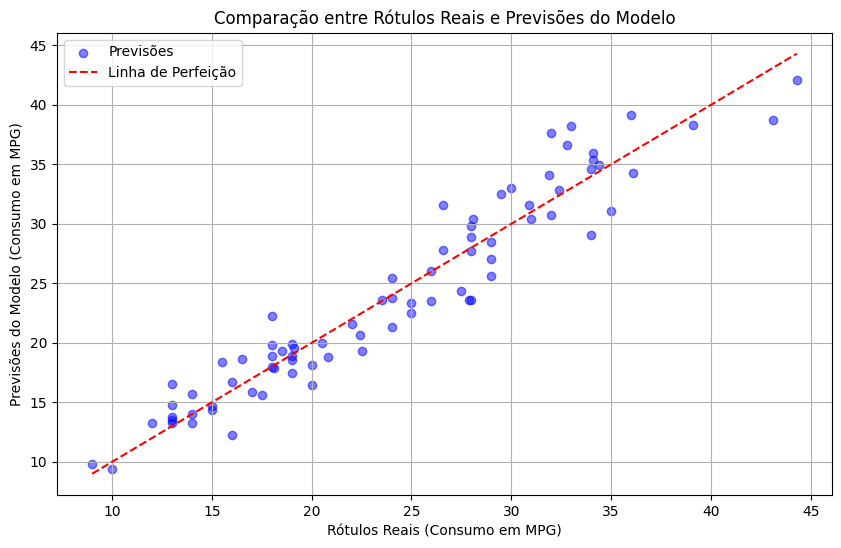

In [27]:
import matplotlib.pyplot as plt

# Gerando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions, color='blue', alpha=0.5, label='Previsões')
plt.xlabel('Rótulos Reais (Consumo em MPG)')
plt.ylabel('Previsões do Modelo (Consumo em MPG)')
plt.title('Comparação entre Rótulos Reais e Previsões do Modelo')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--', label='Linha de Perfeição')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Salvar o modelo treinado no formato nativo do Keras
keras_file = "automobile.keras"
tf.keras.models.save_model(model, keras_file)

# Converter o modelo Keras para o formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Salvar o modelo TFLite em um arquivo
open("automobile.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpf1hlociq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133204769834960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133204769838128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133204769835664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133204769835136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133204769834784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133204769840944: TensorSpec(shape=(), dtype=tf.resource, name=None)


21328